# BUILDING A DEFUALT DETECTION MODEL

---



## Table of Contents
1. Problem Description (Brief Write Up)
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Model Selection
5. Evaluation
6. Discussion and Possible Improvements

## 1. Problem Description

The data set we will be working on contains payment information of 30,000 credit card holders obtained from a bank in Taiwan. 

Each data sample is described by 23 feature attributes and a binary target feature (default or not) valued 0 (= not default) or 1 (= default). 

The 23 explanatory attributes are:

### X1 - X5: Indivual attributes of customer (should this be dummified)

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

### X6 - X11: Repayment history from April to Septemeber 2005
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months, . . . 8 = payment delay for eight months; 9 = payment delay for nine months and above.


X6 = the repayment status in September, 2005

X7 = the repayment status in August, 2005

X8 = the repayment status in July, 2005

X9 = the repayment status in June, 2005

X10 = the repayment status in May, 2005

X11 = the repayment status in April, 2005. 

### X12 - X17: Amount of bill statement (NT dollar) from April to September 2005

X12 = amount of bill statement in September, 2005; 

X13 = amount of bill statement in August, 2005

. . .

X17 = amount of bill statement in April, 2005. 

### X18 - X23: Amount of previous payment (NT dollar)
X18 = amount paid in September, 2005

X19 = amount paid in August, 2005

. . .

X23 = amount paid in April, 2005. 


## EDA

In this section we will explore the data set, its shape and its features to get an idea of the data.

### Importing packages and the dataset

In [114]:
import pandas as pd

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
import numpy as np

In [117]:
url = 'https://raw.githubusercontent.com/reonho/bt2101disrudy/master/card.csv'
df = pd.read_csv(url,  header = 1, index_col = 0)
# Dataset is now stored in a Pandas Dataframe
df0 = df

In [118]:
#rename the target variable to "Y" for convenience
df["Y"] = df["default payment next month"] 
df = df.drop("default payment next month", axis = 1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [119]:
size = df.shape
print("Data has {} Columns and {} Rows".format(size[1], size[0]))

Data has 24 Columns and 30000 Rows


In [120]:
#check for null values
df.isnull().any().sum() 

0

There are no null values in the data.

We can also calculate some summary statistics for each attribute.

In [121]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Exploring the features

**1) Exploring target attribute:**


In [122]:
All = df.shape[0]
default = df[df['Y'] == 1]
nondefault = df[df['Y'] == 0]

x = len(default)/All
y = len(nondefault)/All

print('defaults :',x*100,'%')
print('non defaults :',y*100,'%')

defaults : 22.12 %
non defaults : 77.88000000000001 %


Text(0, 0.5, 'Frequency')

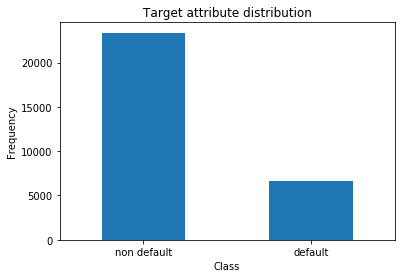

In [123]:
# plotting target attribute against frequency
labels = ['non default','default']
classes = pd.value_counts(df['Y'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Target attribute distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

**2) Exploring categorical attributes**

Categorical attributes are:
- Sex
- Education
- Marriage

**2a) Checking formatting for categorical attributes:**

Since all categorical attributes are in numerical format, there is no need to convert them into numerical factors.

**2b) Analysis of categorical data groups**

- Sex
- Education
- Marriage

In [124]:
print(df["SEX"].value_counts().apply(lambda r: r/All*100))
print("--------------------------------------------------------")
print(df["EDUCATION"].value_counts().apply(lambda r: r/All*100))
print("--------------------------------------------------------")
print(df["MARRIAGE"].value_counts().apply(lambda r: r/All*100))

2    60.373333
1    39.626667
Name: SEX, dtype: float64
--------------------------------------------------------
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64
--------------------------------------------------------
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64


**Conclusion**

- Categorical variable SEX does not seem to have any missing/extra groups, and it is separated into Male = 1 and Female = 2
- Categorical variable MARRIAGE seems to have unknown group = 0, which could be assumed to be missing data, with other groups being Married = 1, Single = 2, Others = 3
- Categorical variable EDUCATION seems to have unknown group = 0,5,6, with other groups being graduate school = 1, university = 2, high school = 3, others = 4

**2c) Analysing the relationship between categorical attributes and default paymment (target attribute)**

- Sex
- Education
- Marriage



In [125]:
#proportion of target attribute (for reference)
print('Total target attributes:')
print('non defaults :',y*100,'%')
print('defaults :',x*100,'%')
print("--------------------------------------------------------")
#analysing default payment with Sex
sex_target = pd.crosstab(df["Y"], df["SEX"]).apply(lambda r: r/r.sum()*100).rename(columns = {1: "Male", 2: "Female"}, index = {0: "non defaults", 1: "defaults"})
print(sex_target)
print("--------------------------------------------------------")
#analysing default payment with education
education_target = pd.crosstab(df["Y"], df["EDUCATION"]).apply(lambda r: r/r.sum()*100).rename(index = {0: "non defaults", 1: "defaults"})
print(education_target)
print("--------------------------------------------------------")
#analysing default payment with marriage
marriage_target = pd.crosstab(df["Y"], df["MARRIAGE"]).apply(lambda r: r/r.sum()*100).rename(columns = {0: "unknown",1: "married", 2: "single", 3: "others"},index = {0: "non defaults", 1: "defaults"})
print(marriage_target)

Total target attributes:
non defaults : 77.88000000000001 %
defaults : 22.12 %
--------------------------------------------------------
SEX                Male     Female
Y                                 
non defaults  75.832773  79.223719
defaults      24.167227  20.776281
--------------------------------------------------------
EDUCATION         0          1          2          3          4          5  \
Y                                                                            
non defaults  100.0  80.765234  76.265146  74.842384  94.308943  93.571429   
defaults        0.0  19.234766  23.734854  25.157616   5.691057   6.428571   

EDUCATION             6  
Y                        
non defaults  84.313725  
defaults      15.686275  
--------------------------------------------------------
MARRIAGE        unknown    married     single     others
Y                                                       
non defaults  90.740741  76.528296  79.071661  73.993808
defaults       9.25925

In [126]:
# we would like to conduct a chi square test of independence using the contingency tables above
import scipy.stats as sp_stat

def sigf(p, confidence):
  return str(p) + " *** [Significant at the " + str(int(confidence*100)) + "% Level]" if p < 1-confidence else p

#print the p values for the test statistic of each chi-sq test
print("SEX:", sigf(sp_stat.chi2_contingency(sex_target)[1], 0.95))
print("EDUCATION:", sigf(sp_stat.chi2_contingency(education_target)[1],0.95))
print("MARRIAGE:", sigf(sp_stat.chi2_contingency(marriage_target)[1],0.95))

SEX: 0.6854422910010494
EDUCATION: 1.0276815835411287e-08 *** [Significant at the 95% Level]
MARRIAGE: 0.016161318279331434 *** [Significant at the 95% Level]


**Conclusion**

Categorical attributes EDUCATION and MARRIAGE are associated with the target variable.

We will omit SEX from our models as it is statistically insignificant.

Categorical attributes SEX and MARRIAGE have approximately uniform distributions throughout groups of categories.

**3) Analysis of Numerical Attributes**

The numerical attributes are:
   




In [127]:
#printing numerical attributes
pd.DataFrame(df.drop(['SEX', 'EDUCATION', 'MARRIAGE','Y'], axis = 1).columns)

,0
0,LIMIT_BAL
1,AGE
2,PAY_0
3,PAY_2
4,PAY_3
5,PAY_4
6,PAY_5
7,PAY_6
8,BILL_AMT1
9,BILL_AMT2


**Meaning of attributes PAY_0 to PAY_6**

The numeric value in these attributes shows the past history of a credit card holder, example -2 means: No consumption of credit card, -1 means that holder paid the full balance, 0 means the use of revolving credit; 1= paymentdelay of one month; 2= payment delay of two months and so on.



**3a) Limit Balance**

In [128]:
#Find out min and max value of LIMIT BALANCE
print(df["LIMIT_BAL"].describe())

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


Text(0.5, 1.0, 'Distribution of Limit Balance')

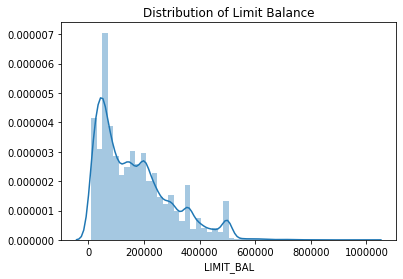

In [129]:
sns.distplot(df["LIMIT_BAL"]).set_title('Distribution of Limit Balance')

**3b) Analysis of Age**

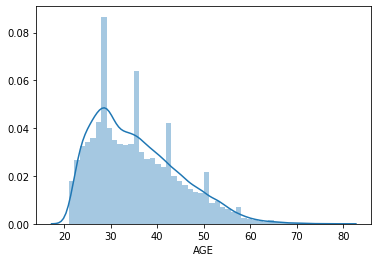

In [130]:
sns.distplot(df.AGE)

To find out the relationships between the features, we calculate the absolute value of R with the target for all attributes. (R = Correlation Coefficient)


In [131]:
#absolute correlation coefficient
pd.DataFrame(df.drop(['SEX', 'EDUCATION', 'MARRIAGE','Y'], axis=1).apply(lambda x: x.corr(df.Y) if x.corr(df.Y) > 0 else -x.corr(df.Y)).sort_values(ascending = False))

,0
PAY_0,0.324794
PAY_2,0.263551
PAY_3,0.235253
PAY_4,0.216614
PAY_5,0.204149
PAY_6,0.186866
LIMIT_BAL,0.153520
PAY_AMT1,0.072929
PAY_AMT2,0.058579
PAY_AMT4,0.056827


We observe that the "repayment status" attributes are the most highly correlated with the target variable and we would expect them to be more significant in predicting credit default. In fact the later the status, the more correlated it is.

The least correlated attributes are the bill amounts.

We can also generate a correlation matrix (heatmap) to see which features are the most correlated with each other.

Text(0.5, 1.05, 'Correlation Matrix')

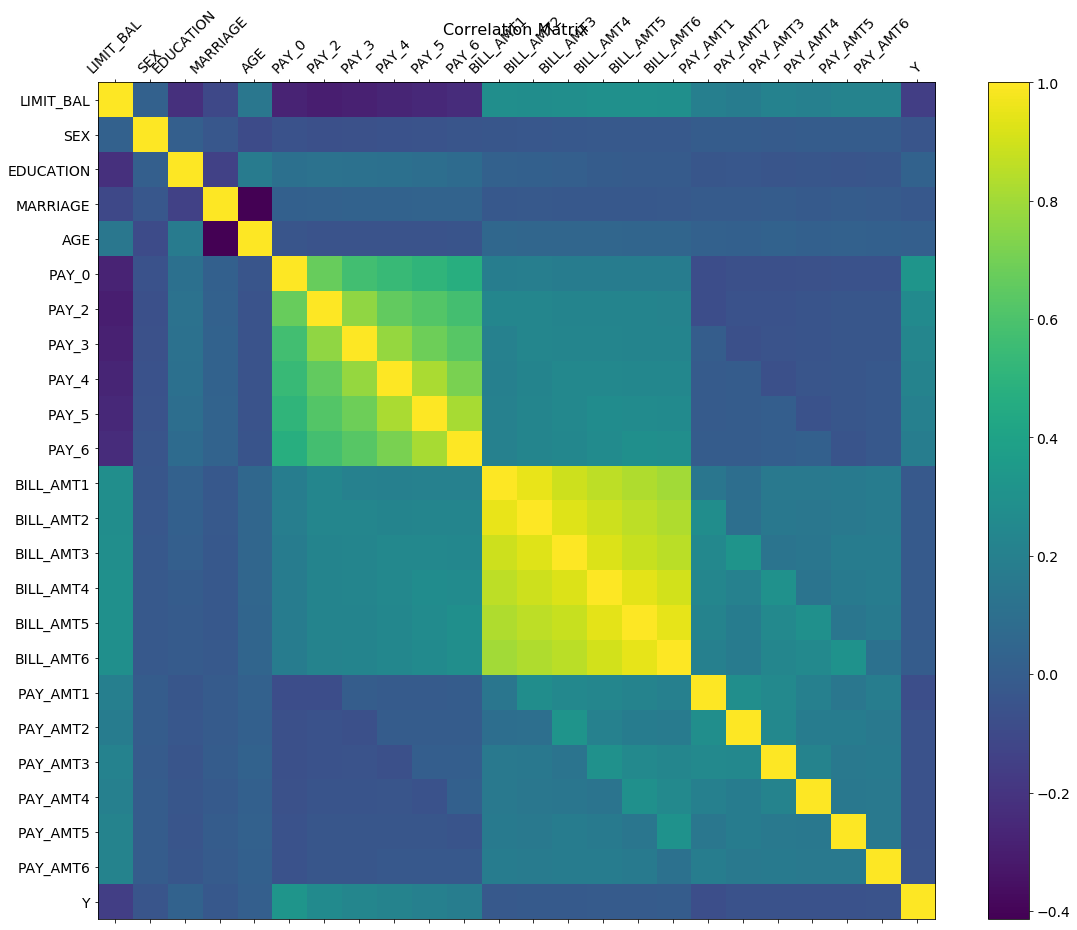

In [132]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

The heatmap reveals that the payment and billed amounts across the 5 months are highly correlated with each other.  Highly Correlated factors should be removed before carrying out any regression to prevent multicollinearity.

- Linear regression
- Scatterplot matrix
- Boxplot matrix

## Data Preprocessing


???
1. get rid of unknown attributes
2. normalise
3. pca?


## Model Selection

In this part, we will fit machine learning models learnt in BT2101 to this classification problem, and pick the model that can produce the best results.

We will be attempting to fit the following models:
- K-Nearest Neighbour
- Support Vector Machine
- Decision Tree 
- Naive Bayes Classifier
- Logistic Regression
- Neural Network


In [133]:
#using kfold to create train test splits
import sklearn.model_selection as skm
kf = skm.KFold(10)

In [134]:
from sklearn.metrics import *

In [135]:
#using holdout sampling for train test split
ft = df.drop("Y", axis = 1)
target = df["Y"]
X_train,X_test,y_train,y_test = skm.train_test_split(ft,target,test_size=0.20)
#make the results reproducible
np.random.seed(2101) 

To make things easier, we define a get_roc function that will plot an ROC curve for all the models we evaluate

In [136]:
def get_roc(model, y_test, X_test, name):
    try:
        fpr = roc_curve(y_test,model.predict_proba(X_test)[:,1])[0]
        tpr = roc_curve(y_test,model.predict_proba(X_test)[:,1])[1]
        thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])[2]
    except:
        fpr = roc_curve(y_test,model.predict(X_test))[0]
        tpr = roc_curve(y_test,model.predict(X_test))[1]
        thresholds = roc_curve(y_test,model.predict(X_test))[2]
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for ' + name)
    plt.plot(fpr,tpr,label='ROC curve (AUC = %0.2f)' % (auc(fpr, tpr)))
    plt.legend(loc="lower right")
    
    #find- best threshold
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print("Optimal Threshold: " + str(optimal_threshold))
    
    plt.show()


In [137]:
def confusion(y_test, predictions, name):
    conf = pd.crosstab(y_test,predictions, rownames=['Actual'], colnames=['Predicted'])
    print("Of " + str(conf[0][1] + conf[1][1]) + " Defaulters, the " + name + " identified " + str(conf[1][1])) 
    return conf

### Evaluation 
We will select the model based on the model evaluation. The key metrics we will compute are:
(Need someone to fill in the formula)

1. Accuracy
2. Precision
3. Recall
4. F1 Measure
5. AUROC

Because of the nature of a default detection problem, we would like to prioritise recall for defaults. 
This means we will place more importance in correctly identifying a defaulter than avoiding misclassifying a non-defaulter. (Assumming that the bank loses more money when lending to a defaulter than not lending to a non-defaulter)


### Baseline - Random Classifier (Test)
This part aims to provide a benchmark accuracy for our models, i.e. a random classifier with (expected) accuracy of 0.5.

In [138]:
from random import *
import sklearn.metrics as skmt

def rnjezus(i):
  return randint(0, 1)

# Holdout sampling
print("Holdout Sample Accuracy:")
print(skmt.classification_report(y_test, list(map(lambda x : rnjezus(x), range(len(X_test))))))

# K-fold
accuracies = []
for train,test in kf.split(df):
  prediction = list(map(lambda x : rnjezus(x), test))
  actual = list(df["Y"][test+1])
  
  #By definition the columns correspond to the predicted values and rows are the actuals
  conf_mat = skmt.confusion_matrix(actual, prediction)
  #print(pd.DataFrame(conf_mat))

  accuracies.append(skmt.accuracy_score(actual, prediction))

print("Kfold Average Accuracy:", sum(accuracies)/len(accuracies))

Holdout Sample Accuracy:
              precision    recall  f1-score   support

           0       0.77      0.51      0.61      4645
           1       0.22      0.49      0.31      1355

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.46      6000
weighted avg       0.65      0.50      0.54      6000

Kfold Average Accuracy: 0.4976666666666666


### Model 1 - K-Nearest Neighbour

In [139]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))
                                
for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train,y_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel())


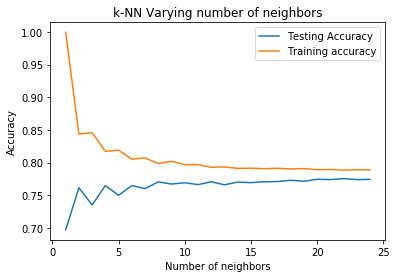

In [140]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [141]:
# best k:
idx = np.where(test_accuracy == max(test_accuracy))
k = neighbours[idx][0]
knn = KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())
print(skmt.classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4645
           1       0.52      0.08      0.14      1355

    accuracy                           0.78      6000
   macro avg       0.65      0.53      0.50      6000
weighted avg       0.72      0.78      0.71      6000



Despite a reasonably high accuracy, the KNN model has very low recall for defaults.

In [142]:
confusion(y_test, knn.predict(X_test), "KNN")

Of 1355 Defaulters, the KNN identified 108


Predicted,0,1
Actual,,
0,4545,100
1,1247,108


### Model 2 - Decision Trees

#### Theory:
The decision tree algorithm aims to recursively split the data points in the training set until the data points are completely separated or well separated. At each iteration, the tree splits the datasets by the feature(s) that give the maximum reduction in heterogeneity, which is calculated by a heterogeneity index.

Below is a binary decision tree that has been split for a few iterations.

![image.png](https://elf11.github.io/images/decisionTree.png)

Since the target for this project is binary (fraud = yes or no) we will be building a binary decision tree, using the the GINI Index as the Heterogeneity index. The GINI is given by:

![image.png](https://miro.medium.com/max/664/1*otdoiyIwxJI-UV0ukkyutw.png)

The GINI index measures how heterogenous a single node is (0 being completely homogenous and 1 being heterogenous). For each possible split, we will calculate the *weighted sum* of the GINI indices of the child nodes, and choose the split that results in the maximum information gain. i.e. reduction in the weighted sum of the GINI Index.

#### Training
We will now construct a simple decision tree using the GINI index.

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [145]:
print(classification_report(y_train, tree.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18719
           1       1.00      1.00      1.00      5281

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000



The training set accuracy is 1, which means the datapoints are completely separated by the decision tree. We evaluate on the test set below.

In [146]:
confusion(y_test, tree.predict(X_test), "Decision Tree (GINI)")

Of 1355 Defaulters, the Decision Tree (GINI) identified 560


Predicted,0,1
Actual,,
0,3801,844
1,795,560


Optimal Threshold: 1.0


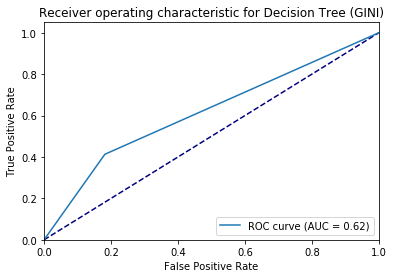

In [147]:
get_roc(tree, y_test, X_test, "Decision Tree (GINI)")

In [148]:
print(classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4645
           1       0.40      0.41      0.41      1355

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.73      0.73      0.73      6000



### Random Forest Classifier

#### Theory
Random Forest is an ensemble method for the decision tree algorithm. It works by randomly choosing different features and data points to train multiple trees (that is, to form a forest) - and the resulting prediction is decided by the votes from all the trees. 

Decision Trees are prone to overfitting on the training data, which reduces the performance on the test set. Random Forest mitigates this by training multiple trees. Random Forest is a form of bagging ensemble where the trees are trained concurrently. 

#### Training
To keep things consistent, our Random Forest classifier will also use the GINI Coefficient.



In [149]:
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(n_estimators=300)

In [150]:
randf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
print(classification_report(y_train, randf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18719
           1       1.00      1.00      1.00      5281

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000



The training set has also been 100% correctly classified by the random forest model. Evaluating with the test set:

In [152]:
print(classification_report(y_test, randf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4645
           1       0.65      0.37      0.47      1355

    accuracy                           0.81      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



In [153]:
confusion(y_test, randf.predict(X_test), "Decision Tree (Random Forest)")

Of 1355 Defaulters, the Decision Tree (Random Forest) identified 501


Predicted,0,1
Actual,,
0,4376,269
1,854,501


Optimal Threshold: 0.25666666666666665


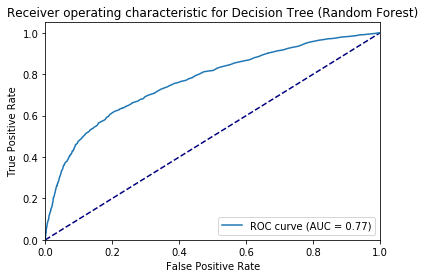

In [154]:
get_roc(randf, y_test, X_test, "Decision Tree (Random Forest)")

The random forest ensemble performs much better than the decision tree alone. The accuracy and AUROC are both superior to the decision tree alone.

### Gradient Boosted Trees Classifier

#### Theory
In this part we train a gradient boosted trees classifier using xgBoost. xgBoost is short for "Extreme Gradient Boosting". It is a boosting ensemble method for decision trees, which means that the trees are trained consecutively, where each new tree added is trained to correct the error from the previous tree.

xgBoost uses the gradient descent algorithm that we learnt in BT2101 at each iteration to maximise the reduction in the error term. (More details? math?)
 
#### Training
For consistency our xgBoost ensemble will use n_estimators = 300 as we have done for the random forest ensemble.

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier(n_estimators=300, max_depth = 4)
xgb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [156]:
print(classification_report(y_train, xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     18719
           1       0.77      0.44      0.56      5281

    accuracy                           0.85     24000
   macro avg       0.81      0.70      0.73     24000
weighted avg       0.84      0.85      0.83     24000



We observe that the xgBoost ensemble did not fully separate the data in the training set. (The default maximum depth is 3, so that might be a factor). Evaluating on the test set,

In [157]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4645
           1       0.66      0.37      0.48      1355

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.79      6000



Optimal Threshold: 0.23767613676167343


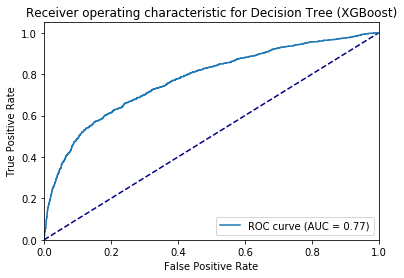

In [158]:
get_roc(xgb, y_test, X_test, "Decision Tree (XGBoost)")

In [159]:
confusion(y_test, xgb.predict(X_test), "Decision Tree (Gradient Boosted Trees)")

Of 1355 Defaulters, the Decision Tree (Gradient Boosted Trees) identified 503


Predicted,0,1
Actual,,
0,4389,256
1,852,503


From the accuracy and AUROC, we observe that the XGBoost performs similarly to the random forest ensemble. It has a slight bump in AUROC at 0.76, but the accuracy is the same.

### Model 3 - Logistic Regression

#### Theory
Logistic regression is a regression technnique used to predict binary target variables. It works on the same principles as a linear regression model. 

Our binary target (default vs non-default) can be expressed in terms of odds of defaulting, which is the ratio of the probability of default and probability of non-default. 

In the logistic regression model, we log the odds (log-odds) and equate it to a weighted sum of regressors.

![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/4a5e86f014eb1f0744e280eb0d68485cb8c0a6c3)

We then find weights for the regressors that best fits the data. Since the binary target (default or not) follows a bernoulli distribution, each data point has the following probability distribution function:

![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/614e0c64d59f0ff2e926deafcb2de6e502394fac)

We would like to update p for each data point such that the log product (joint probability) of the above function for all data points is maximised. In other words, we are maximising the log-likelihood function.

The logistic regression equation produces a "squashed" curve like the one below. We then pick a cutoff value for the y axis to classify a data point as 0 (non-default) or 1 (default).

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1280px-Logistic-curve.svg.png)

#### Training
We will adopt a top-down approach for training our logistic regression model, i.e. include all regressors first and then remove the most insignificant ones at each iteration to achieve the best fit.

In [160]:
import statsmodels.api as sm

In [161]:
glm = sm.Logit(y_train,X_train).fit()
glm.summary()

Optimization terminated successfully.
         Current function value: 0.464583
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23977
Method:                           MLE   Df Model:                           22
Date:                Wed, 06 Nov 2019   Pseudo R-squ.:                  0.1184
Time:                        10:37:26   Log-Likelihood:                -11150.
converged:                       True   LL-Null:                       -12647.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL  -9.464e-07   1.74e-07     -5.433      0.000   -1.29e-06   -6.05e-07
SEX           -0.2012      0.030     -6.782      0.000      -0.259      -0.143
EDUCATION     -0.1390      0.023     -6.168      0.000      -0.183      -0.095
MARRIAGE      -0.2880      0.025    -11.330      0.000      -0.338      -0.238
AGE            0.0014      0.001      0.907      0.364      -0.002       0.004
PAY_0          0.5527      0.020     28.033      0.000       0.514       0.591
PAY_2          0.0684      0.023      3.012      0.003       0.024       0.113
PAY_3          0.0833      0.025      3.305      0.001       0.034       0.133
PAY_4          0.0143      0.028      0.515      0.606      -0.040       0.069
PAY_5          0.0325      0.030      1.078      0.281      -0.027       0.092
PAY_6          0.0203      0.025      0.817      0.414      -0.028       0.069
BILL_AMT1  -6.352e-06   1.31e-06     -4.848      0.000   -8.92e-06   -3.78e-06
BILL_AMT2   3.958e-06   1.67e-06      2.365      0.018    6.77e-07    7.24e-06
BILL_AMT3   6.543e-07   1.45e-06      0.451      0.652   -2.19e-06     3.5e-06
BILL_AMT4  -2.436e-07   1.52e-06     -0.161      0.872   -3.22e-06    2.73e-06
BILL_AMT5   1.356e-06   1.68e-06      0.808      0.419   -1.93e-06    4.65e-06
BILL_AMT6  -7.978e-09   1.32e-06     -0.006      0.995    -2.6e-06    2.58e-06
PAY_AMT1   -1.643e-05   2.74e-06     -5.990      0.000   -2.18e-05   -1.11e-05
PAY_AMT2   -8.733e-06   2.31e-06     -3.788      0.000   -1.33e-05   -4.21e-06
PAY_AMT3   -2.995e-06   1.95e-06     -1.538      0.124   -6.81e-06    8.23e-07
PAY_AMT4   -5.848e-06   2.12e-06     -2.759      0.006      -1e-05   -1.69e-06
PAY_AMT5   -3.815e-06   2.01e-06     -1.894      0.058   -7.76e-06    1.34e-07
PAY_AMT6   -3.507e-06   1.53e-06     -2.292      0.022   -6.51e-06   -5.08e-07
==============================================================================
"""

In [162]:
print(classification_report(y_train,list(glm.predict(X_train)>0.5)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18719
           1       0.71      0.23      0.35      5281

    accuracy                           0.81     24000
   macro avg       0.76      0.60      0.62     24000
weighted avg       0.79      0.81      0.77     24000



In [163]:
print(classification_report(y_test,list(glm.predict(X_test)>0.5)))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4645
           1       0.71      0.23      0.35      1355

    accuracy                           0.80      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.80      0.76      6000



The logisitc model with all features performs quite well on both the train and test set with an accuracy of 0.81. We will now try removing all the insignificant features to see how that affects the model performance.

In [164]:
#remove all insignificant attributes
sig = glm.pvalues[glm.pvalues < 0.05]
glm_2 = sm.Logit(y_train,X_train[sig.index]).fit()
glm_2.summary()

Optimization terminated successfully.
         Current function value: 0.465111
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23987
Method:                           MLE   Df Model:                           12
Date:                Wed, 06 Nov 2019   Pseudo R-squ.:                  0.1174
Time:                        10:37:26   Log-Likelihood:                -11163.
converged:                       True   LL-Null:                       -12647.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL  -1.007e-06   1.62e-07     -6.220      0.000   -1.32e-06   -6.89e-07
SEX           -0.1916      0.028     -6.803      0.000      -0.247      -0.136
EDUCATION     -0.1319      0.019     -6.927      0.000      -0.169      -0.095
MARRIAGE      -0.2889      0.025    -11.519      0.000      -0.338      -0.240
PAY_0          0.5635      0.020     28.857      0.000       0.525       0.602
PAY_2          0.0744      0.022      3.313      0.001       0.030       0.118
PAY_3          0.1204      0.021      5.799      0.000       0.080       0.161
BILL_AMT1  -6.803e-06    1.3e-06     -5.223      0.000   -9.36e-06   -4.25e-06
BILL_AMT2   5.763e-06   1.36e-06      4.249      0.000     3.1e-06    8.42e-06
PAY_AMT1   -1.804e-05   2.75e-06     -6.564      0.000   -2.34e-05   -1.27e-05
PAY_AMT2   -7.366e-06   2.01e-06     -3.665      0.000   -1.13e-05   -3.43e-06
PAY_AMT4   -5.439e-06   1.86e-06     -2.926      0.003   -9.08e-06    -1.8e-06
PAY_AMT6   -3.948e-06   1.52e-06     -2.598      0.009   -6.93e-06    -9.7e-07
==============================================================================
"""

In [165]:
print(classification_report(y_train,list(glm_2.predict(X_train[sig.index])>0.5)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18719
           1       0.71      0.23      0.35      5281

    accuracy                           0.81     24000
   macro avg       0.76      0.60      0.62     24000
weighted avg       0.79      0.81      0.77     24000



In [166]:
print(classification_report(y_test,list(glm_2.predict(X_test[sig.index])>0.5)))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4645
           1       0.72      0.23      0.35      1355

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.76      6000



Since there is not much change to the model performance on both the train and test set when we reduce the features, we will use the reduced logistic regression model from this point onwards (Principle of Parsimony). 

We now Calculate the AUROC for the train set.

Optimal Threshold: 0.27420941443503294


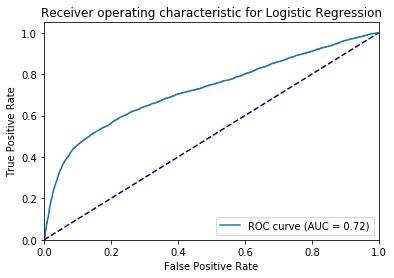

In [167]:
get_roc(glm_2, y_train, X_train[sig.index], "Logistic Regression")

Since the optimal cut off was found to be 0.276 using the training data, we will use that as our cut off for our evaluation of the test set.

In [168]:
print(classification_report(y_test,list(glm_2.predict(X_test[sig.index])>0.276)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4645
           1       0.52      0.53      0.52      1355

    accuracy                           0.78      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.78      0.78      0.78      6000



Unfortunately, the training accuracy has gone down when we used the optimal cutoff. However, accuracy may be misleading in a dataset like ours where most of the targets are non-defaults. The recall here is more important since we prioritise detecting defaulters at the expense of misclassifying non-defaulters. Looking at recall, our lower cutoff is able to correctly catch more defaulters.


Calculate the confusion matrices for both cut offs to better compare their performance.

In [169]:
confusion(y_test,glm_2.predict(X_test[sig.index])>0.276, "Logistic Regression")

Of 1355 Defaulters, the Logistic Regression identified 717


Predicted,False,True
Actual,,
0,3979,666
1,638,717


In [170]:
confusion(y_test,glm_2.predict(X_test[sig.index])>0.5, "Logistic Regression")

Of 1355 Defaulters, the Logistic Regression identified 310


Predicted,False,True
Actual,,
0,4522,123
1,1045,310


It is evident that the cutoff of 0.276 is better able to detect defualts, with 688 detected in the test set for 0.276 but only 346 detected for 0.5

Optimal Threshold: 0.26257360578023514


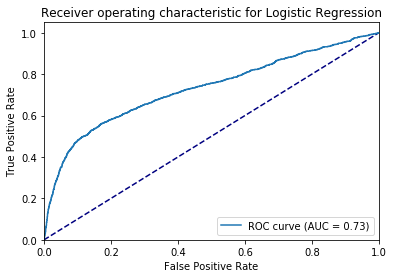

In [171]:
get_roc(glm_2, y_test, X_test[sig.index], "Logistic Regression")

### Model x - Support Vector Machine


### Standardizing attributes to prep for PCA

Using training set to determine parameters of standardization
apply the parameters to standardize all attributes in training and test set

In [172]:
#Standardising data
from sklearn.preprocessing import StandardScaler
# Standardizing the features
names = X_train.columns
scalar = StandardScaler()
scalar = scalar.fit(X_train)
X_train_standardize = scalar.transform(X_train)
X_train_standardize = pd.DataFrame(data = X_train_standardize, columns = names)
X_test_standardize = scalar.transform(X_test)
X_test_standardize = pd.DataFrame(data = X_test_standardize, columns = names)

In [173]:
#check if numerical attributes are normailised with mean = 0 and sd = 1
X_train_standardize.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,...,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04
mean,1.017149e-16,7.708834e-16,4.951317e-16,5.376625e-16,-1.626419e-17,8.471233e-16,-1.830735e-15,1.871623e-15,-1.919451e-15,2.199158e-15,...,-2.152861e-16,-2.414226e-16,-1.714184e-16,2.617582e-16,6.972201e-17,-1.275126e-16,-1.808068e-16,2.455443e-16,2.328091e-16,-2.814427e-16
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,...,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00
min,-1.215668e+00,-1.237489e+00,-2.356076e+00,-2.978518e+00,-1.576658e+00,-1.762383e+00,-1.557417e+00,-1.530280e+00,-1.517284e+00,-1.527848e+00,...,-2.944276e+00,-3.312793e+00,-1.998575e+00,-6.347299e+00,-3.586451e-01,-2.583330e-01,-3.011661e-01,-3.101540e-01,-3.120793e-01,-2.887985e-01
25%,-9.079055e-01,-1.237489e+00,-1.085669e+00,-1.059473e+00,-8.151410e-01,-8.730392e-01,-7.232169e-01,-6.965670e-01,-6.662719e-01,-6.466090e-01,...,-6.394791e-01,-6.366044e-01,-6.344794e-01,-6.321678e-01,-2.953392e-01,-2.217062e-01,-2.787466e-01,-2.911114e-01,-2.962091e-01,-2.827191e-01
50%,-2.154410e-01,8.080881e-01,1.847384e-01,8.595724e-01,-1.624117e-01,1.630464e-02,1.109834e-01,1.371457e-01,1.847406e-01,2.346298e-01,...,-3.894941e-01,-3.783304e-01,-3.666160e-01,-3.669621e-01,-2.240251e-01,-1.711519e-01,-1.964268e-01,-2.146227e-01,-2.153100e-01,-2.064582e-01
75%,5.539640e-01,8.080881e-01,1.847384e-01,8.595724e-01,5.991058e-01,1.630464e-02,1.109834e-01,1.371457e-01,1.847406e-01,2.346298e-01,...,1.938462e-01,1.769007e-01,1.652917e-01,1.768375e-01,-4.065942e-02,-4.307087e-02,-3.828314e-02,-5.129604e-02,-4.786688e-02,-6.899112e-02
max,6.401442e+00,8.080881e-01,5.266367e+00,2.778618e+00,4.733058e+00,7.131055e+00,6.784586e+00,6.806847e+00,6.992841e+00,7.284540e+00,...,2.329162e+01,1.317106e+01,1.455042e+01,1.547053e+01,3.161085e+01,7.225311e+01,5.120848e+01,3.337398e+01,2.720452e+01,2.873154e+01


### Perfrom initial PCA for 2 components for visualization
giving 2 pca components, we will visualize the information retained after performing 2 pca components

In [174]:
#perform pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents =  pca.fit_transform(X_train_standardize)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [175]:
#amount of information each principal component holds after projecting the data to a lower dimensional subspace.
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.28322138 0.17768244]


This shows that the information of principal component 1 retained is 28.4% and principal component 2 retained is 17.8%, both of which is quite low

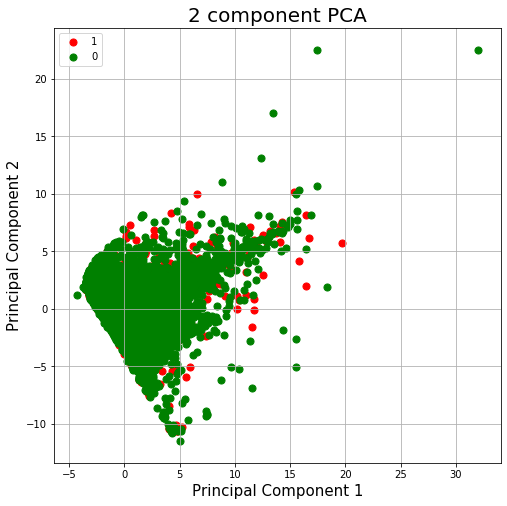

In [176]:
#visualizing pca
pca_visualize_df = pd.concat([principalDf, y_train], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca_visualize_df['Y'] == target
    ax.scatter(pca_visualize_df.loc[indicesToKeep, 'principal component 1']
               , pca_visualize_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

As we can see, there is no clear linear separation for the target attributes for 2 pca components, justifying the above percentages. Nonetherless, we will continue to use PCA by finding the  optimmum number of PC components which retains 90% of information

### Perform PCA to retain 90% of information
perform PCA to reduce components so we can run SVM model

In [177]:
#setting pca threshold to 90%
pca = PCA(0.9)

In [178]:
pca.fit(X_train_standardize)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [179]:
#get number of components after pca
print('No. of components before pca: {}'.format(len(X_train.columns)))
print('No. of components after pca: {}'.format(pca.n_components_))

No. of components before pca: 23
No. of components after pca: 13


As we can see, the number of components is reduced from 23 components to 13 components

In [180]:
#perform pca on training and test attributes
X_train_pca = pca.transform(X_train_standardize)
X_test_pca = pca.transform(X_test_standardize)

### Apply SVM model
Next, we will used the reduced attributes train set to train our SVM model

First, we train our SVM model without parameter tuning
nor pca reduction

In [68]:
from sklearn import svm
#train svm model without standardization and no parameter tuning
clf_original = svm.SVC(kernel = 'rbf', probability = True)
clf_original.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Optimal Threshold: 0.2207190875203909


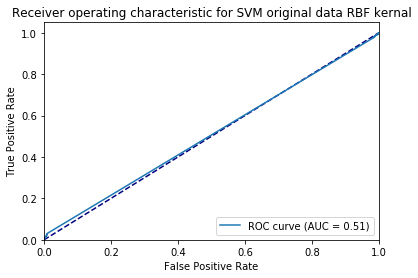

In [102]:
#plot roc for svm
get_roc(clf_original, y_test, X_test, "SVM original data RBF kernal")

In [109]:
#confusion matrix
confusion(y_test,clf_original.predict(X_test), "SVM original data RBF kernal")

Of 1301 Defaulters, the SVM original data RBF kernal identified 17


Predicted,0,1
Actual,,
0,4681,18
1,1284,17


Evidently, SVM model fit with no tuning or feature reduction with RBF kernal shows low performance. Now, we will fit SVM model with reduced standardized features and access accuracy

note that the default values of gamma = 1/13 and c= 1

In [181]:
from sklearn import svm
#train svm model with feature reduction and no parameter tuning
clf_reduced = svm.SVC(kernel = 'rbf', probability = True, gamma = 1/13, C = 1)
clf_reduced.fit(X_train_pca, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.07692307692307693,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Optimal Threshold: 0.17778938528613197


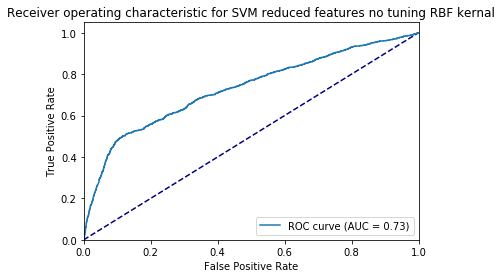

In [182]:
#plot roc for svm
get_roc(clf_reduced, y_test, X_test_pca, 
        "SVM reduced features no tuning RBF kernal")

In [183]:
#confusion matrix
confusion(y_test,clf_reduced.predict(X_test_pca), "SVM reduced features no tuning RBF kernal")

Of 1355 Defaulters, the SVM reduced features no tuning RBF kernal identified 401


Predicted,0,1
Actual,,
0,4425,220
1,954,401


In [184]:
print(classification_report(y_test,clf_reduced.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4645
           1       0.65      0.30      0.41      1355

    accuracy                           0.80      6000
   macro avg       0.73      0.62      0.64      6000
weighted avg       0.78      0.80      0.78      6000



As you can see, by reducing features through pca, the AUROC curve improves, suggesting a better prediction model.

We will now try to find best parameters for SVM model

In [77]:
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1,10]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
svc_param_selection(X_train_pca, y_train,10)


{'C': 10, 'gamma': 0.01}

In [185]:
#train svm model with feature reduction and cost = 10, gamma = 0.01
clf_reduced_tuned = svm.SVC(kernel = 'rbf', probability = True, C= 10, gamma = 0.01)
clf_reduced_tuned.fit(X_train_pca, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Optimal Threshold: 0.16880724430144842


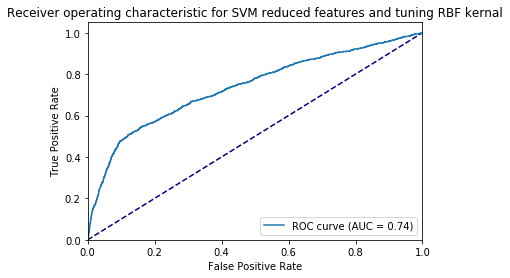

In [186]:
get_roc(clf_reduced_tuned, y_test, X_test_pca, 
        "SVM reduced features and tuning RBF kernal")

In [187]:
#confusion matrix
confusion(y_test,clf_reduced_tuned.predict(X_test_pca), "SVM reduced features and tuning RBF kernal")

Of 1355 Defaulters, the SVM reduced features and tuning RBF kernal identified 365


Predicted,0,1
Actual,,
0,4450,195
1,990,365


In [188]:
print(classification_report(y_test,clf_reduced_tuned.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4645
           1       0.65      0.27      0.38      1355

    accuracy                           0.80      6000
   macro avg       0.73      0.61      0.63      6000
weighted avg       0.78      0.80      0.77      6000



From this, we can conclude that fitting SVM model with PCA-reduced features but no parameter tuning is most accurate based on Recall value

Thus, fitting an SVM with PCA-reduced features with default gamma = 1/13 and C = 1 with kernal = 'rbf' is the best model. However, this is only for rbf kernal.